## Creating a Linear Regression

In [1]:
# Import the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [2]:
# Importing Data
raw_data = pd.read_csv('minutes_and_certificates.csv')

In [3]:
# Copying the data
data = raw_data.copy()

In [4]:
# Data Preview
data.head()

,student_id,minutes_watched,certificates_issued
0,4640,586.80,1
1,5836,1903.12,3
2,9754,702.77,1
3,801,6066.00,13
4,2022,115.37,1


In [5]:
# Defining target and input variable
target = data['certificates_issued']
inputs = data['minutes_watched']

In [6]:
# Spliting data into training and test data
x_train, x_test, y_train, y_test = train_test_split(inputs, target,
                                                    test_size=0.2,
                                                    random_state=42) 

In [7]:
# Reshape the data
x_train = x_train.to_numpy() 
x_test = x_test.to_numpy() 
y_train = y_train.to_numpy() 
y_test = y_test.to_numpy() 

x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [8]:
# Crreating and fitting model instances
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [10]:
# Inequation of y = mx+b
b = reg.intercept_
m = reg.coef_
b, m

(1.180460179810099, array([0.00176332]))

In [11]:
# Calculating the R-squared
reg.score(x_train, y_train)

0.2524245460737261

##### The value we obtained is approximately 0.25. This suggests that about 25% of the variability in the target variable (the number of certificates issued) is explained by the input variable (the number of minutes watched). This model does not account for the other 75%.

* An R-squared value of 0.305 is not a bad result, but, as we mentioned, it implies that other factors also play a role in the number of certificates issued. Let’s list them one by one.

* One such factor, for example, includes different courses with different lengths. Therefore, a student passing three short courses will be issued three certificates, while a student passing one long course—roughly the length of three short ones—will be given only one certificate. Another factor could be that some students pass exams without watching the courses. The reason could be that they are familiar with the subject and only aim for a document proving their proficiency.

* The model, therefore, provides some insight into the relationship between these two quantities, but there’s still a large portion of the variance that remains unexplained. The number of minutes watched is reasonable to include when predicting the number of certificates issued but should not be the sole factor considered. 

In [12]:
# Predicting nos. of certificates issued
y_hat_test = reg.predict(x_test)

reg.predict([[1200]])

array([3.29645018])

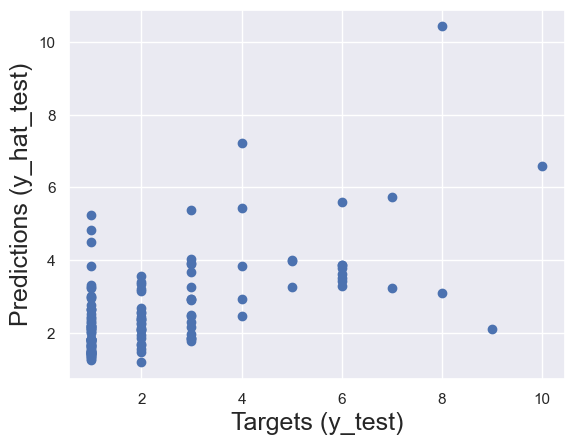

In [13]:
# Model Performance vizualisation
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show();